In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
base_dir = "data"
df_dir = os.path.join(base_dir, "Invistico_Airline.csv")

In [4]:
df = pd.read_csv(df_dir)
print("Kích thước df: ", df.shape)

Kích thước df:  (129880, 23)


In [5]:
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


## 1. Lấy dữ liệu

Dữ liệu về độ hài lòng về dịch vụ hàng không được lấy từ khảo sát khác hàng của một công ty hàng không.

Nguồn: https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction

License CC0: Public Domain

Dữ liệu được thu thập thông qua khảo sát đánh giá của khách hàng sử dụng dịch vụ.

## 2. Khám phá dữ liệu

#### Kích thước dữ liệu

In [7]:
print("Số dòng: ", df.shape[0])
print("Số cột: ",  df.shape[1])

Số dòng:  129880
Số cột:  23


#### Xét theo dòng

In [10]:
df.iloc[0, :]

satisfaction                               satisfied
Gender                                        Female
Customer Type                         Loyal Customer
Age                                               65
Type of Travel                       Personal Travel
Class                                            Eco
Flight Distance                                  265
Seat comfort                                       0
Departure/Arrival time convenient                  0
Food and drink                                     0
Gate location                                      2
Inflight wifi service                              2
Inflight entertainment                             4
Online support                                     2
Ease of Online booking                             3
On-board service                                   3
Leg room service                                   0
Baggage handling                                   3
Checkin service                               

Mỗi dòng là kết quả khảo sát chuyến bay của một hành khách

Các thông tin trên một dòng bao gồm 
+ độ hài lòng của khách hàng
+ Giới tính khách hàng 
+ Loại khách hàng
+ Tuổi
+ Loại chuyến đi
+ Dịch vụ 
+ Khoảng cách di chuyển
+ Độ thoải mái ghế ngồi
+ Thuận tiện thời gian đến/đi
+ Đồ ăn/uống
+ Địa điểm cổng
+ Wifi
+ Giải trí trên chuyến bay
+ Hỗ trợ trực tuyến
+ Đặt vé trực tuyến
+ Dịch vụ tại chỗ
+ Chỗ để chân
+ Hành lý
+ Checkin
+ Vệ sinh
+ Checkin trực tuyến
+ Độ trễ cất cánh
+ Độ trễ hạ cánh. 

#### Xét theo cột

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Hầu hết các cột đều có dữ liệu int64, có 5 cột có dữ liệu dạng object, 1 cột có dữ liệu dạng float64.

Lưu ý: cột 21 và 22 có ý nghĩa tương tự nhau nhưng lại được lưu với 2 kiểu dữ liệu khác nhau, cột 22 có giá trị null.

##### Các cột giá trị số

In [18]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Xét các dữ liệu số:

+ Các cột về mức độ hài lòng về các mặt của khách hàng đều có kiểu giá trị int64, được đánh số từ 0-5.

+ Tuổi của hành khách nhỏ nhất là 7, lớn nhất là 85, trung bình 39-40 tuổi.

+ Khoảng cách bay nhỏ nhất là 50 dv, lớn nhất là hơn 6500 dv, đơn vị đo khoảng cách không được nêu ở nguồn của dữ liệu.

+ 2 cột cuối có giá trị khá tương đồng nhau (do trễ cất cánh thường kéo theo trễ hạ cánh)

##### Các cột giá trị object

In [21]:
df.describe(include="object")

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


Xét các dữ liệu object:

+ Các cột đều có 2 giá trị có thể có, ngoại trừ cột Class có 3 giá trị có thể có.


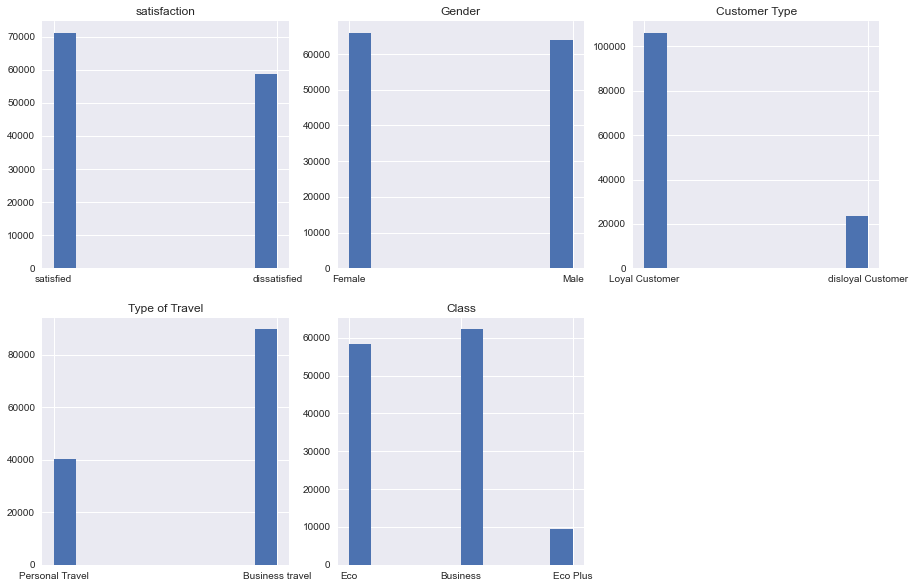

In [48]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
cols = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[cols[i]])
    plt.title(cols[i])